# Importation des librairies

In [7]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importation des données

In [8]:
positif_value = pd.read_pickle(r'data/imdb_raw_pos.pickle')
print(positif_value[0])

I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.


In [9]:
negatif_value = pd.read_pickle(r'data/imdb_raw_neg.pickle')
print(negatif_value[0])

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.


In [10]:
print('Nombre de commentaires', len(positif_value))
print('Nombre de commentaires', len(negatif_value))

Nombre de commentaires 12500
Nombre de commentaires 12500


In [11]:
pos_value = {'Critiques': positif_value}
neg_value = {'Critiques': negatif_value}

## Create pandas dataframe

In [12]:
# Creation de la DataFrame avec Pandas.
dataframe1 = pd.DataFrame(pos_value)
dataframe1['Sentiment'] = 'positif'
dataframe1['Reponse'] = 1
dataframe2 = pd.DataFrame(neg_value)
dataframe2['Sentiment'] = 'Negatif'
dataframe2['Reponse'] = 0

In [13]:
### Concaténation de la donnée sous forme de tableau
data = pd.concat([dataframe1, dataframe2])
data

,Critiques,Sentiment,Reponse
0,I went and saw this movie last night after bei...,positif,1
1,Actor turned director Bill Paxton follows up h...,positif,1
2,As a recreational golfer with some knowledge o...,positif,1
3,"I saw this film in a sneak preview, and it is ...",positif,1
4,Bill Paxton has taken the true story of the 19...,positif,1
...,...,...,...
12495,I occasionally let my kids watch this garbage ...,Negatif,0
12496,When all we have anymore is pretty much realit...,Negatif,0
12497,The basic genre is a thriller intercut with an...,Negatif,0
12498,Four things intrigued me as to this film - fir...,Negatif,0


## Stumble DATA


In [14]:
# STUMBLE DATA
stumb = data.sample(frac=1).reset_index()
stumb = stumb.drop(['index'], axis=1)
print(stumb.head(10))

                                           Critiques Sentiment  Reponse
0  There are few films that deal with things that...   positif        1
1  An American Werewolf in London had some funny ...   Negatif        0
2  Rowan Atkinson's Mr. Bean ranks right up there...   positif        1
3  When you think 'Oliver Stone' the movies that ...   positif        1
4  If you are looking for an erotic masterpiece t...   positif        1
5  All Boris Karloff fans will love this classic ...   positif        1
6  The story of Ed Gein is interesting, VERY inte...   Negatif        0
7  If you value your freedom!<br /><br />I first ...   positif        1
8  Just in case the title didn't give it away - t...   Negatif        0
9  Assault on Precinct 13: 3/10: Let us forget fo...   Negatif        0


In [15]:
X = stumb.Critiques
y = stumb.Reponse

In [16]:
X[:2]

0    There are few films that deal with things that...
1    An American Werewolf in London had some funny ...
Name: Critiques, dtype: object

In [17]:
y[:2]

0    1
1    0
Name: Reponse, dtype: int64

# SPLIT DATA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

In [19]:
print('longuer de X train :', len(X_train))
print('longuer de y train :', len(y_train))
print('longuer de X test :', len(X_test))
print('longuer de y test :', len(y_test))

longuer de X train : 20000
longuer de y train : 20000
longuer de X test : 5000
longuer de y test : 5000


# VECTORISATION

- transfromation des données cathegorielles en quantitafives

In [20]:
vector = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)

In [21]:
vector.fit(X_train)

CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [22]:
X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

In [23]:
X_train_vector

<20000x26834 sparse matrix of type '<class 'numpy.int64'>'
	with 1695507 stored elements in Compressed Sparse Row format>

# SCALER DATA
    -Mise à l'échelle ou noramalisation de données

In [48]:
import pandas as pd
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

In [54]:
transformer = MaxAbsScaler().fit(X_train_vector)

In [55]:
transformer_Xtrain = transformer.transform(X_train_vector)

In [56]:
print(transformer_Xtrain)

  (0, 540)	0.14285714285714285
  (0, 772)	1.0
  (0, 824)	0.14285714285714285
  (0, 1692)	0.2
  (0, 2325)	0.25
  (0, 3176)	0.4
  (0, 4421)	0.5
  (0, 4744)	0.25
  (0, 5002)	0.3333333333333333
  (0, 5033)	0.2
  (0, 5609)	0.5
  (0, 5624)	0.3333333333333333
  (0, 6106)	0.25
  (0, 6793)	0.3333333333333333
  (0, 8173)	0.18181818181818182
  (0, 8893)	0.25
  (0, 8932)	0.16666666666666666
  (0, 9634)	0.5
  (0, 9982)	0.07142857142857142
  (0, 10479)	0.08333333333333333
  (0, 11270)	0.08333333333333333
  (0, 11789)	0.1
  (0, 13320)	0.3333333333333333
  (0, 14134)	0.25
  (0, 14200)	1.0
  :	:
  (19999, 23625)	0.25
  (19999, 23688)	0.5
  (19999, 23935)	0.5
  (19999, 24033)	0.2
  (19999, 24181)	0.07142857142857142
  (19999, 24260)	0.3333333333333333
  (19999, 24296)	1.0
  (19999, 24384)	0.25
  (19999, 24408)	0.14285714285714285
  (19999, 24710)	0.2
  (19999, 24900)	1.0
  (19999, 24955)	0.2
  (19999, 25095)	0.5
  (19999, 25635)	1.0
  (19999, 25671)	0.3333333333333333
  (19999, 25708)	0.3333333333333333

In [57]:
transformer_Xtrain

<20000x26834 sparse matrix of type '<class 'numpy.float64'>'
	with 1695507 stored elements in Compressed Sparse Row format>

# FIRST MODEL Logistic Regression
    Mise en place d'unn modèle de regression logistique 

In [67]:
#Accuracy using Logistic Regression Model
Log_Reg = LogisticRegression()

In [68]:
Log_Reg.fit(transformer_Xtrain, y_train)

LogisticRegression()

### PREDICTION

In [69]:
y_prediction= Log_Reg.predict(X_test_vector)

In [70]:
print(y_prediction)

[0 1 0 ... 1 0 1]


In [71]:
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_prediction)*100,'%',sep='')


Logistic Regression
Accuracy Score: 87.14%


### CONFUSION MATRIX

In [72]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_prediction), sep = '\n')

Confusion Matrix: 
[[2162  276]
 [ 367 2195]]


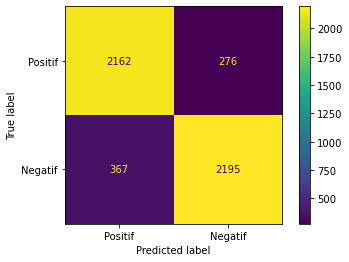

In [64]:
confus_matrix = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=confus_matrix, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# 2rd MODEL

# TEST MODEL LG

In [65]:
test = []
test.append(input())
test_vect = vector.transform(test)
predLabel = Log_Reg.predict(test_vect)
tags = ['Negative','Positive']
print("Le model à prédict que votre commentaire est ",tags[predLabel[0]])

Le model à prédict que votre commentaire est  Positive
